# Snapchat Political Ads

DSI-10 SF

## Problem Statement

- Who is advertising the most?
- What background research might we need to do to understand their political motives?
- Who is being targeted?
- How much money is being spent over time?

**Package imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

**Concatenate Data**

In [2]:
ads_18 = pd.read_csv('./data/political-ads-2018.csv')
ads_19 = pd.read_csv('./data/political-ads-2019.csv')

# create a year column 
ads_18['year'] = 2018
ads_19['year'] = 2019

if list(ads_18.columns) == list(ads_19.columns):
    data = pd.concat([ads_18, ads_19])
else:
    print('The datasets do not match. \nInvestigate difference in columns before combining the data.')

# reset index to be unique values
data.reset_index(drop=True, inplace=True)

In [3]:
nrows, ncols = data.shape
print(f'The data has {nrows} rows and {ncols} columns.')

The data has 4305 rows and 35 columns.


In [4]:
data['year'].value_counts()

2019    3646
2018     659
Name: year, dtype: int64

Hmm, big difference in the number of advertisements b/w years...

In [5]:
data.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties,year
0,abb9dda8f2cca976fae6f8c1cc27f601b9c0f09ecf0687...,https://www.snap.com/political-ads/asset/4ebc6...,USD,1161,235578,2018/10/17 15:00:00Z,2018/11/07 04:00:00Z,Democratic Congressional Campaign Committee,"430 S Capitol St SE,Washington,20003,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://mypollingplace.org/,2018
1,04294a442fdcfaae165561c24f4e9f3e186a61c5e704b8...,https://www.snap.com/political-ads/asset/8bebf...,EUR,2469,1738967,2018/09/24 02:00:00Z,2018/10/14 09:33:20Z,Carat Norge AS,"Pilestredet 8,Oslo,0180,NO",NaN,...,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,2018
2,52cbc60a6aff7ff26483e50aad81c71f9f828026eaae87...,https://www.snap.com/political-ads/asset/d4043...,EUR,534,226202,2018/12/18 22:55:44Z,2019/01/13 11:31:15Z,Maxlead Services B.V.,"Wilhelminapark 17,Oegstgeest,2342 AD,NL",NaN,...,NaN,NaN,ANDROID,Provided by Advertiser,nl,NaN,NaN,NaN,web_view_url:https://www.consumentenbond.nl/ac...,2018
3,36c3bdfa1918bf492f41a59cc647f0c6034ae822622098...,https://www.snap.com/political-ads/asset/b7127...,USD,10,3842,2018/12/01 17:37:07Z,2019/01/10 22:51:08Z,LPM,GB,NaN,...,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:http://jidesanwoolu.ng,2018
4,57e32f1e9b3b92f69d7c4f62e1a1ee675fdca080b18ad3...,https://www.snap.com/political-ads/asset/c8d85...,USD,996,105047,2018/10/17 15:00:00Z,2018/11/07 04:00:00Z,Democratic Congressional Campaign Committee,"430 S Capitol St SE,Washington,20003,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://mypollingplace.org/,2018


In [6]:
# change column names
data.columns = data.columns.str.lower()

In [7]:
print(data.columns)

Index(['adid', 'creativeurl', 'currency code', 'spend', 'impressions',
       'startdate', 'enddate', 'organizationname', 'billingaddress',
       'candidateballotinformation', 'payingadvertisername', 'gender',
       'agebracket', 'countrycode', 'regions (included)', 'regions (excluded)',
       'electoral districts (included)', 'electoral districts (excluded)',
       'radius targeting (included)', 'radius targeting (excluded)',
       'metros (included)', 'metros (excluded)', 'postal codes (included)',
       'postal codes (excluded)', 'location categories (included)',
       'location categories (excluded)', 'interests', 'ostype', 'segments',
       'language', 'advanceddemographics', 'targeting connection type',
       'targeting carrier (isp)', 'creativeproperties', 'year'],
      dtype='object')


### Data Types

In [8]:
data.dtypes

adid                               object
creativeurl                        object
currency code                      object
spend                               int64
impressions                         int64
startdate                          object
enddate                            object
organizationname                   object
billingaddress                     object
candidateballotinformation         object
payingadvertisername               object
gender                             object
agebracket                         object
countrycode                        object
regions (included)                 object
regions (excluded)                 object
electoral districts (included)     object
electoral districts (excluded)    float64
radius targeting (included)        object
radius targeting (excluded)        object
metros (included)                  object
metros (excluded)                  object
postal codes (included)            object
postal codes (excluded)           

## Exploring the Data

#### Tracking time per ad campaign

In [9]:
data.loc[:, ['startdate', 'enddate']].head()

,startdate,enddate
0,2018/10/17 15:00:00Z,2018/11/07 04:00:00Z
1,2018/09/24 02:00:00Z,2018/10/14 09:33:20Z
2,2018/12/18 22:55:44Z,2019/01/13 11:31:15Z
3,2018/12/01 17:37:07Z,2019/01/10 22:51:08Z
4,2018/10/17 15:00:00Z,2018/11/07 04:00:00Z


Some ads don't have an end date. I'm going to assume that they are current.

In [10]:
data.loc[:, ['startdate', 'enddate']].isnull().sum()

startdate      0
enddate      777
dtype: int64

Converting those without an end date to be now, **January 3, 2020**.

In [11]:
data.loc[data.loc[:, 'enddate'].isnull(), 'enddate'] = datetime.now()

In [12]:
data.loc[:, 'enddate'].isnull().sum()

0

Nice, no missing values. Now we can convert these to datetime and calculate the difference.

In [13]:
data.loc[:, 'startdate'] = pd.to_datetime(data['startdate'])
data.loc[:, 'enddate'] = pd.to_datetime(data['enddate'], utc=True)

# creating the new column here, by subtracting end date from start date.
data['campaign_length'] = data['enddate'] - data['startdate']
data.head()

,adid,creativeurl,currency code,spend,impressions,startdate,enddate,organizationname,billingaddress,candidateballotinformation,...,interests,ostype,segments,language,advanceddemographics,targeting connection type,targeting carrier (isp),creativeproperties,year,campaign_length
0,abb9dda8f2cca976fae6f8c1cc27f601b9c0f09ecf0687...,https://www.snap.com/political-ads/asset/4ebc6...,USD,1161,235578,2018-10-17 15:00:00+00:00,2018-11-07 04:00:00+00:00,Democratic Congressional Campaign Committee,"430 S Capitol St SE,Washington,20003,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://mypollingplace.org/,2018,20 days 13:00:00
1,04294a442fdcfaae165561c24f4e9f3e186a61c5e704b8...,https://www.snap.com/political-ads/asset/8bebf...,EUR,2469,1738967,2018-09-24 02:00:00+00:00,2018-10-14 09:33:20+00:00,Carat Norge AS,"Pilestredet 8,Oslo,0180,NO",NaN,...,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,2018,20 days 07:33:20
2,52cbc60a6aff7ff26483e50aad81c71f9f828026eaae87...,https://www.snap.com/political-ads/asset/d4043...,EUR,534,226202,2018-12-18 22:55:44+00:00,2019-01-13 11:31:15+00:00,Maxlead Services B.V.,"Wilhelminapark 17,Oegstgeest,2342 AD,NL",NaN,...,NaN,ANDROID,Provided by Advertiser,nl,NaN,NaN,NaN,web_view_url:https://www.consumentenbond.nl/ac...,2018,25 days 12:35:31
3,36c3bdfa1918bf492f41a59cc647f0c6034ae822622098...,https://www.snap.com/political-ads/asset/b7127...,USD,10,3842,2018-12-01 17:37:07+00:00,2019-01-10 22:51:08+00:00,LPM,GB,NaN,...,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:http://jidesanwoolu.ng,2018,40 days 05:14:01
4,57e32f1e9b3b92f69d7c4f62e1a1ee675fdca080b18ad3...,https://www.snap.com/political-ads/asset/c8d85...,USD,996,105047,2018-10-17 15:00:00+00:00,2018-11-07 04:00:00+00:00,Democratic Congressional Campaign Committee,"430 S Capitol St SE,Washington,20003,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://mypollingplace.org/,2018,20 days 13:00:00


**Convert timedelta to days (float)**

In [14]:
def timedelta_to_days(x):
    return x.total_seconds() / (60 * 60 * 24)

In [15]:
data.loc[:, 'campaign_length'] = data['campaign_length'].map(timedelta_to_days)

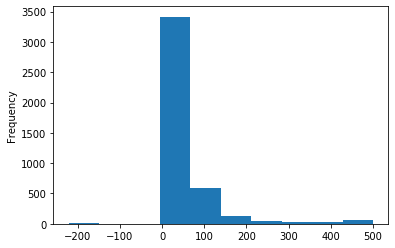

In [16]:
data.loc[:, 'campaign_length'].plot(kind='hist');

Some negative values...

In [17]:
negative_length = data['campaign_length'] < 0
data.loc[negative_length, ['spend', 'impressions', 'startdate', 'enddate', 'year', 'campaign_length']]

,spend,impressions,startdate,enddate,year,campaign_length
1226,52,18793,2019-09-04 04:00:00+00:00,2019-08-31 03:59:59+00:00,2019,-4.000012
1379,37,28465,2019-11-20 17:00:00+00:00,2019-04-12 21:00:00+00:00,2019,-221.833333
1383,14,5304,2019-09-04 04:00:00+00:00,2019-08-31 03:59:59+00:00,2019,-4.000012
1483,70,26626,2019-09-04 04:00:00+00:00,2019-08-31 03:59:59+00:00,2019,-4.000012
1569,6,2506,2019-09-04 04:00:00+00:00,2019-08-31 03:59:59+00:00,2019,-4.000012
1584,15,6142,2019-04-23 07:00:00+00:00,2019-04-23 06:59:59+00:00,2019,-0.000012
1622,45,34875,2019-11-20 17:00:00+00:00,2019-04-12 21:00:00+00:00,2019,-221.833333
1886,16,5885,2019-09-04 04:00:00+00:00,2019-08-31 03:59:59+00:00,2019,-4.000012
1887,44,15962,2019-09-04 04:00:00+00:00,2019-08-31 03:59:59+00:00,2019,-4.000012
1930,25,9027,2019-09-04 04:00:00+00:00,2019-08-31 03:59:59+00:00,2019,-4.000012


**Plotting campaign length**

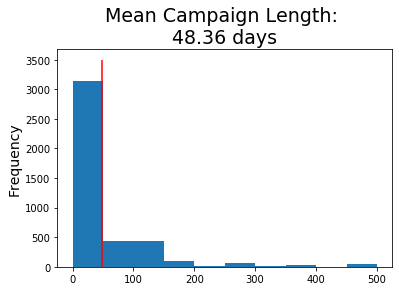

In [18]:
mean_length = data.loc[data['campaign_length'] > 0, 'campaign_length'].mean()

plt.hist(data.loc[data['campaign_length'] > 0, 'campaign_length'])
plt.title(f'Mean Campaign Length: \n{round(mean_length, 2)} days', size=19)
plt.ylabel('Frequency', size=14)
plt.vlines(x = data.loc[:, 'campaign_length'].mean(), 
           ymin = 0, ymax=3500, colors='red');

### Currencies - this might give us some way of tracking where the ads are coming from

In [19]:
data['currency code'].unique()

array(['USD', 'EUR', 'GBP', 'CAD', 'AUD'], dtype=object)

In [20]:
data['currency code'].value_counts()

USD    2563
EUR     705
GBP     588
CAD     409
AUD      40
Name: currency code, dtype: int64

**Looks like political ads are coming in from the US, Great Britain, Canada, Australia, and Europe**

However, we can't compare the amount spent until all of the values are converted to the same currency. Looks like most of the ads are coming from the US (plus, I'm from the US) so I'll convert all to `usd`.

---

In [21]:
data['usd'] = None

**Conversion data comes current as of _Jan 3, 2020_ from Google**

- example search:
```EUR to USD```


In [22]:
conversion_dict = {'USD': 1.0, 
                   'EUR': 1.12,
                   'GBP': 1.31,
                   'CAD': 0.77,
                   'AUD': 0.7}

In [23]:
data['currency code'].unique()

array(['USD', 'EUR', 'GBP', 'CAD', 'AUD'], dtype=object)

In [24]:
for currency in data['currency code'].unique():
    currency_filter = (data['currency code'] == currency)
    data.loc[currency_filter, 'usd'] = data.loc[currency_filter, 'spend'] * conversion_dict[currency]

Looks good!

In [25]:
data.loc[:, ['currency code', 'spend', 'usd']].sample(10)

,currency code,spend,usd
3496,EUR,5,5.6
458,CAD,2558,1969.66
2710,EUR,664,743.68
251,USD,63,63
1362,GBP,235,307.85
1709,EUR,2625,2940
1328,EUR,770,862.4
3661,USD,757,757
953,GBP,9,11.79
1466,USD,13,13


### Which currency is spent the most?

This fits with our expectations, more or less. However, it looks like Canada runs more expensive ads...

In [26]:
agg_df = data.groupby('currency code').sum().loc[:, ['spend', 'impressions']].sort_values(by='spend', ascending=False)
agg_df['num_ads'] = data['currency code'].value_counts()
agg_df['cost_per_view'] = agg_df['spend'] / agg_df['impressions']

In [27]:
agg_df

,spend,impressions,num_ads,cost_per_view
currency code,,,,
USD,4811695,1754205765,2563,0.002743
CAD,888098,458136628,409,0.001939
EUR,614372,436685146,705,0.001407
GBP,403632,218531802,588,0.001847
AUD,221683,43880072,40,0.005052


Okay, so unsurprisingly, US currency is spent the most. Snapchat is an American company. **Might be interesting to try to find data on number of users from all of these locations.**

---

We can also look at advertising money and engagement per country. Again, the US tops out, 

In [28]:
country_spend = data.groupby('countrycode').sum().loc[:, ['spend', 'impressions']].sort_values(by='spend', ascending=False)

In [29]:
country_spend['num_ads'] = data.groupby('countrycode').count().loc[:, 'spend']

In [30]:
country_spend

,spend,impressions,num_ads
countrycode,,,
united states,4654895,1671436400,2318
canada,887524,460746867,408
united kingdom,386379,207165426,522
norway,314878,129949815,449
australia,223696,44552821,36
france,158671,202878636,72
denmark,77940,36168856,105
germany,61684,22330901,13
united arab emirates,33666,16882276,7


**Which organizations spend the most money?**

In [31]:
data.groupby('organizationname').sum().loc[:, 'spend'].sort_values(ascending=False).head(20)

organizationname
General Mills                                  1683056
Assembly                                        759863
Cossette Media Inc                              554022
Mediavest Spark                                 279488
Australian Government Department of Finance     210000
R/GA                                            170687
Blueprint Interactive                           170559
ACRONYM                                         153123
Dentsu Aegis Network France                     148331
The Aber Group                                  143263
Hawkfish LLC                                    131809
Chong and Koster                                119327
The Labour Party                                116337
Bully Pulpit Interactive                         99135
PHD Canada                                       83797
DNB Bank ASA                                     69164
Vote For Your Future                             63174
RIESTER Sonoran LLC                             

Huh, **General Mills**..., weird. Maybe this is worth looking into!

In [32]:
for i in data.loc[data['organizationname'] == 'General Mills', 'creativeurl']:
    print(i)

https://www.snap.com/political-ads/asset/3f0e1f59038c8456de3f9a10f1cab317cf1ef3b02db6d7ccfdd9475e2f2f6ff3?mediaType=mp4
https://www.snap.com/political-ads/asset/ca83bb800af3c40a85b80cae9d121b8cb1425b1c2211b62ace038805e1ac7521?mediaType=mp4
https://www.snap.com/political-ads/asset/f2153028d0af1f0f9df51388faeacc965329a245b180837a62f4f3583ea39642?mediaType=mp4
https://www.snap.com/political-ads/asset/d970d04f85a783fea6ea3cef7ddef97255d5afe9c34361dfb36029f4daf2801b?mediaType=mp4
https://www.snap.com/political-ads/asset/c5101b8367d69a959b60306e8abc41ccd1fddc7c5b1ae848878de2d5a193a0fd?mediaType=mp4
https://www.snap.com/political-ads/asset/809180356404f9d72cfc98848d36a2cf0a332d01ed9a65c02ddc71947d242de8?mediaType=mp4
https://www.snap.com/political-ads/asset/443dd272e242af3f259d24b780d0bb801b888771e6ff8c37c720697d7548cf8c?mediaType=mp4
https://www.snap.com/political-ads/asset/041eeb7dde00f8d7aae790e930e1e35d2ac327747bc30ff0787e58bfec0d273c?mediaType=mp4


#### Group by Month

_Credit to Gouri and Ingrid_

In [33]:
data["StartMonth"] = pd.DatetimeIndex(data["startdate"]).month
mask = (data["year"] == 2018)
data[mask].groupby(["StartMonth"])["usd"].describe()

,count,unique,top,freq
StartMonth,,,,
6,4.0,4.0,559.79,1.0
7,10.0,9.0,244.86,2.0
8,50.0,50.0,254.00,1.0
9,146.0,124.0,60.00,5.0
10,308.0,279.0,1249.00,4.0
11,108.0,98.0,0.00,2.0
12,33.0,33.0,127.00,1.0


In [34]:
mask = (data["year"] == 2019)
data[mask].groupby("StartMonth")["usd"].describe()

,count,unique,top,freq
StartMonth,,,,
1,24.0,23.0,68.00,2.0
2,32.0,32.0,8446.88,1.0
3,214.0,187.0,0.00,14.0
4,131.0,114.0,168.00,6.0
5,270.0,219.0,2.00,7.0
6,205.0,191.0,214.06,2.0
7,161.0,148.0,91.00,2.0
8,298.0,238.0,1.12,8.0
9,780.0,426.0,0.00,21.0
